# `atomistics` nodes

Example use of the nodes wrapping pyiron's `atomistics` package.

In [1]:
from pyiron_workflow import Workflow

In [2]:
Workflow.register("pyiron_workflow.node_library.atomistics", "atomistics")
Workflow.register("pyiron_workflow.node_library.plotting", "plotting")

/Users/huber/work/pyiron/pyiron_workflow/pyiron_workflow/io.py:404: UserWarning: The keyword 'type_hint' was not found among input labels. If you are trying to update a class instance keyword, please use attribute assignment directly instead of calling this method
  warnings.warn(


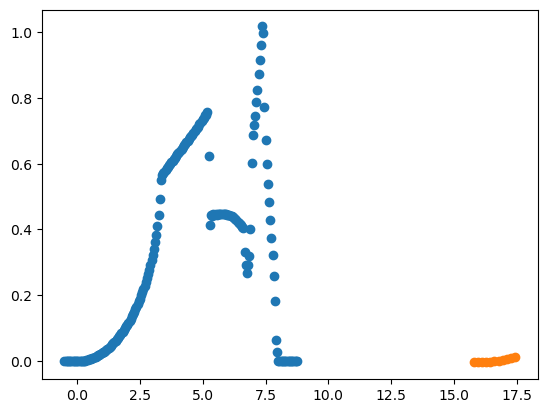

In [3]:
wf = Workflow("ev_curve")

wf.structure = wf.create.atomistics.task.Bulk("Al")
wf.calculator = wf.create.atomistics.calculator.Emt()

wf.ev = wf.create.atomistics.macro.EnergyVolumeCurve(
    structure=wf.structure, 
    calculator=wf.calculator,
)
wf.ev_plot = wf.create.plotting.Scatter(
    wf.ev.outputs.result_dict["volume"],
    wf.ev.outputs.result_dict["energy"]
)

wf.elastic = wf.create.atomistics.macro.ElasticMatrix(
    structure=wf.structure, 
    calculator=wf.calculator,
)
wf.C = wf.elastic.outputs.result_dict["elastic_matrix"]

wf.phonons = wf.create.atomistics.macro.Phonons(
    structure=wf.structure, 
    calculator=wf.calculator,
)
wf.dos_plot = wf.create.plotting.Scatter(
    wf.phonons.outputs.result_dict["total_dos_dict"]["frequency_points"],
    wf.phonons.outputs.result_dict["total_dos_dict"]["total_dos"],
)

out = wf()

/Users/huber/work/pyiron/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel ran was not connected to accumulate_and_run, andthus could not disconnect from it.
  warn(
/Users/huber/work/pyiron/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel accumulate_and_run was not connected to ran, andthus could not disconnect from it.
  warn(
/Users/huber/work/pyiron/pyiron_workflow/pyiron_workflow/channels.py:176: UserWarning: The channel run was not connected to ran, andthus could not disconnect from it.
  warn(


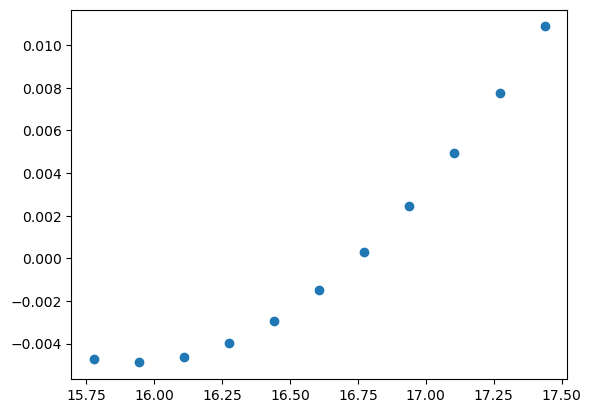

In [4]:
wf.ev_plot()  
# We should be able to look at .value.figure
# but we need to get matplotlib to clear the previous double plot
# This is something to fix in the plotting package.

In [5]:
wf.C.value

array([[47.25994412, 28.71281131, 28.71281131,  0.        ,  0.        ,
         0.        ],
       [28.71281131, 47.25994412, 28.71281131,  0.        ,  0.        ,
         0.        ],
       [28.71281131, 28.71281131, 47.25994412,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 31.72112464,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 31.72112464,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        31.72112464]])

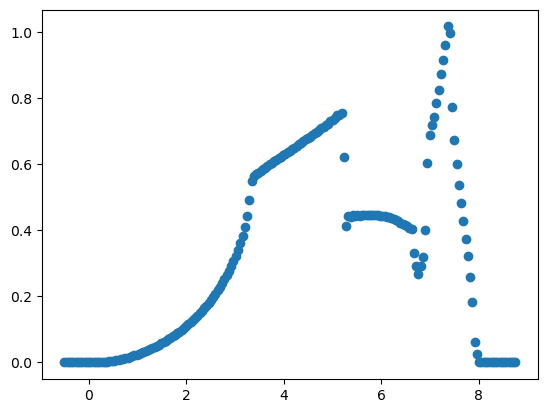

In [6]:
wf.dos_plot()